In [1]:
import sys; sys.path.append("/home/shhsu/download/scClass_v2")
import scClass

In [2]:
import scanpy as sc
import numpy as np

In [3]:
filename_training = "../scClass_data/pbmc_model_subsample.h5ad"
scClass.train.EPOCH = 20

In [4]:
adata = sc.read_h5ad(filename_training)
adata

AnnData object with n_obs × n_vars = 16778 × 20729
    obs: 'origin_cell_type', 'transfer_id'
    var: 'Gene'

In [5]:
adata = scClass.pp.preprocess(adata,normalize=False)

filter type_id=-1 cell:  16778  -> 16778  cells
shuffling data


In [6]:
sc.pp.normalize_total(adata,target_sum=1e5)
adata.X.data = np.log1p(adata.X.data)

In [7]:
dataset = scClass.npz_dataloader(matrix=adata.X,label=adata.obs['transfer_id'])

loading data, it will take time


In [8]:
model = scClass.Model()

In [9]:
scClass.training(dataset,model)

0 
epoch 0 	| loss:2.13714290 | training accuracy:0.41100000| loss:2.43063092 | validation accuracy:0.38539493
0 
epoch 1 	| loss:1.60170567 | training accuracy:0.64000000| loss:1.66728258 | validation accuracy:0.64739195
0 
epoch 2 	| loss:0.83779067 | training accuracy:0.76500000| loss:0.99223888 | validation accuracy:0.72697466
0 
epoch 3 	| loss:0.50757170 | training accuracy:0.83000000| loss:0.64220554 | validation accuracy:0.77675112
0 
epoch 4 	| loss:0.35570326 | training accuracy:0.91300000| loss:0.49423128 | validation accuracy:0.86259314
0 
epoch 5 	| loss:0.29622132 | training accuracy:0.91900000| loss:0.47914407 | validation accuracy:0.86795827
0 
epoch 6 	| loss:0.28699002 | training accuracy:0.92700000| loss:0.43689445 | validation accuracy:0.87928465
0 
epoch 7 	| loss:0.17442624 | training accuracy:0.96800000| loss:0.30318233 | validation accuracy:0.92757079
0 
epoch 8 	| loss:0.21148463 | training accuracy:0.93700000| loss:0.32183346 | validation accuracy:0.89955291
0

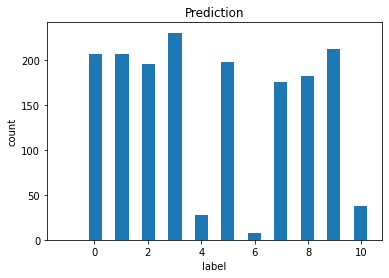

In [10]:
y_pred = scClass.predict(dataset.test_x,model)

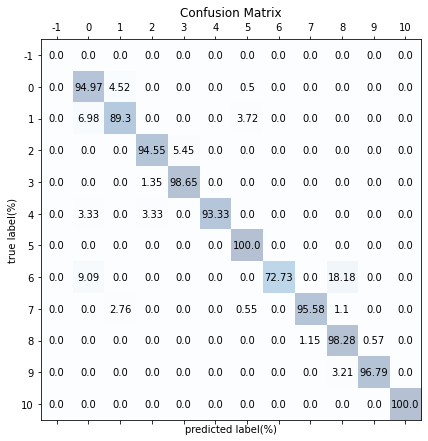

In [11]:
scClass.confusion_matrix(y_pred,dataset.test_y,_filter=True)

In [12]:
model.save("../scClass/data/model_20211205_000002.pkl")

model stored in: '../scClass/data/model_20211205_000002.pkl'
